In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer 
from nltk.tokenize import word_tokenize
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

C:\Users\krish\anaconda3\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("Times_of_India_Healines_since_jan_2020_score.csv")

df.head()

,index,Unnamed: 0,S_No,URL,Date,Headline,Headline Link,Positive,Negative,Neutral,Compound
0,0,0,0,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Shivin Narang injures his hand on the set of h...,http://timesofindia.indiatimes.com//tv/news/hi...,24.2,0.0,75.8,49.39
1,1,1,1,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Allergy cases on the rise in Bengaluru,http://timesofindia.indiatimes.com//life-style...,0.0,0.0,100.0,0.00
2,2,2,2,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,A grand Hanukkah celebration held in the city,http://timesofindia.indiatimes.com//city/benga...,33.3,0.0,66.7,45.88
3,3,3,3,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,"I respect my competitors, because they bring o...",http://timesofindia.indiatimes.com//entertainm...,42.2,0.0,57.8,80.74
4,4,4,4,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Strong New Year resolutions keep young minds m...,http://timesofindia.indiatimes.com//life-style...,51.2,0.0,48.8,74.30


In [3]:
df.shape

(50012, 11)

In [4]:
df.isnull().sum()

index                0
Unnamed: 0           0
S_No                 0
URL                  0
Date                 0
Headline             0
Headline Link    32041
Positive             0
Negative             0
Neutral              0
Compound             0
dtype: int64

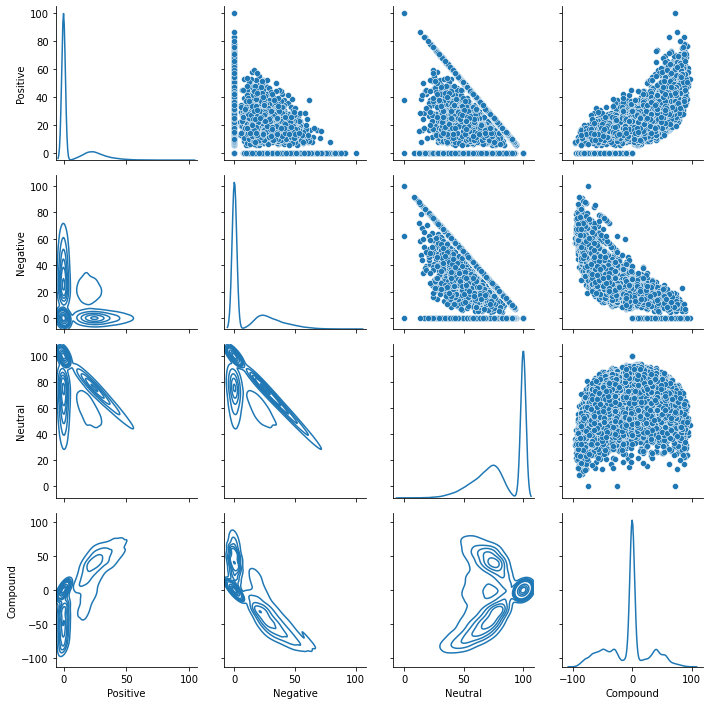

In [5]:
g = sns.PairGrid(
    df, 
    x_vars=["Positive", "Negative", "Neutral","Compound"],
    y_vars=["Positive", "Negative", "Neutral","Compound"],
    diag_sharey=False
)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)


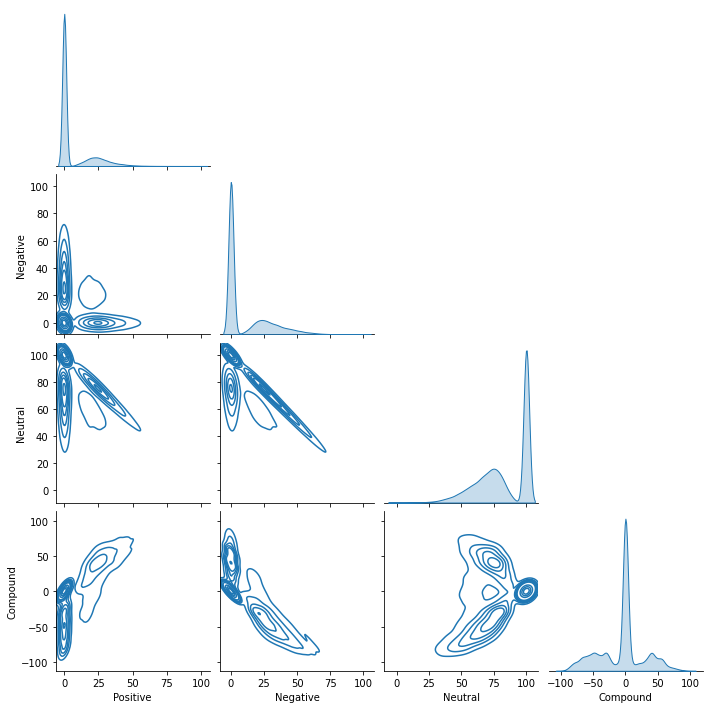

In [6]:
sns.pairplot(
    df, 
    x_vars=["Positive", "Negative", "Neutral","Compound"],
    y_vars=["Positive", "Negative", "Neutral","Compound"],
    kind="kde",
    diag_kind="auto",
    corner=True
)

In [7]:
headline = df["Headline"]
print(headline)

0        Shivin Narang injures his hand on the set of h...
1                   Allergy cases on the rise in Bengaluru
2            A grand Hanukkah celebration held in the city
3        I respect my competitors, because they bring o...
4        Strong New Year resolutions keep young minds m...
                               ...                        
50007       Chemical analysis confirms cobra venom in body
50008    Have spent over Rs 400 crore on Covid fight: G...
50009    After 16-mth wait, work starts on Mukarba Chow...
50010                       More autonomy sought for banks
50011            174 new Covid-19 cases surface in U’khand
Name: Headline, Length: 50012, dtype: object


In [8]:
word_count = lambda s: len(s.split())
word_counts = list(map(word_count, headline))
print(word_counts)

[11, 7, 8, 13, 8, 8, 8, 7, 10, 8, 9, 15, 4, 17, 17, 10, 17, 10, 7, 7, 7, 17, 7, 13, 7, 10, 11, 13, 11, 12, 10, 10, 8, 10, 9, 8, 7, 7, 9, 7, 10, 7, 7, 8, 9, 6, 10, 6, 7, 8, 8, 11, 12, 18, 4, 7, 7, 7, 10, 8, 11, 9, 7, 14, 9, 10, 6, 9, 9, 11, 8, 11, 10, 10, 9, 11, 13, 15, 6, 6, 10, 9, 11, 10, 11, 13, 13, 7, 10, 8, 6, 6, 10, 14, 12, 6, 12, 9, 10, 7, 6, 6, 9, 8, 6, 9, 10, 6, 11, 12, 10, 10, 6, 8, 13, 14, 13, 10, 6, 7, 13, 10, 13, 10, 7, 9, 8, 6, 9, 9, 10, 9, 11, 8, 8, 8, 7, 9, 6, 5, 7, 6, 11, 11, 11, 6, 8, 10, 9, 9, 10, 10, 8, 10, 13, 5, 6, 6, 8, 8, 8, 6, 9, 8, 12, 9, 6, 6, 11, 8, 6, 5, 12, 9, 9, 12, 7, 8, 10, 8, 6, 6, 9, 11, 9, 7, 7, 7, 4, 11, 10, 11, 10, 7, 6, 7, 5, 17, 16, 9, 9, 8, 6, 8, 11, 11, 10, 8, 8, 9, 10, 8, 6, 12, 8, 10, 7, 12, 4, 14, 9, 11, 12, 9, 9, 6, 12, 5, 6, 11, 9, 11, 8, 10, 8, 8, 10, 6, 13, 13, 7, 7, 7, 9, 7, 14, 7, 10, 7, 10, 12, 13, 11, 7, 14, 6, 10, 13, 11, 16, 10, 6, 7, 7, 8, 15, 17, 8, 8, 9, 13, 13, 8, 9, 9, 6, 11, 9, 23, 13, 10, 17, 12, 7, 11, 11, 20, 7, 7, 9, 7, 9,

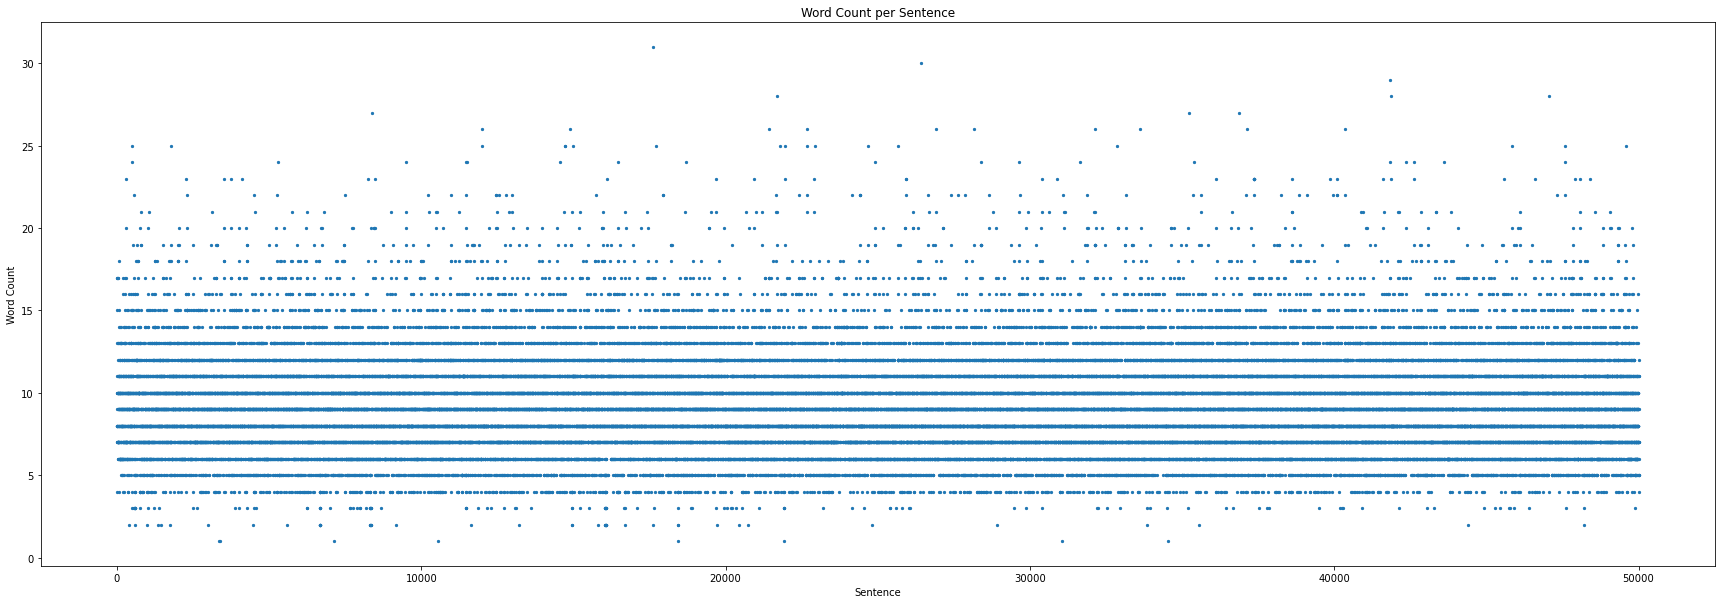

In [9]:
fig = plt.figure(figsize=(30, 10))
plt.scatter(range(len(df)), word_counts,s=5)
plt.xlabel('Sentence')
plt.ylabel('Word Count')
plt.title('Word Count per Sentence')
plt.show()

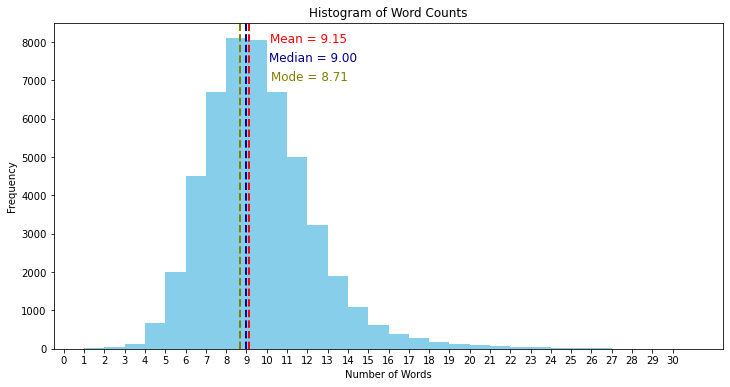

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(word_counts, bins=30,color='skyblue')

plt.xticks(range(0, max(word_counts)))

# Mean
mean = np.mean(word_counts)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
plt.text(mean+ 1, 8000, 'Mean = {:.2f}'.format(mean), fontsize=12, color='red')

# Median
median = np.median(word_counts)
plt.axvline(median, color='darkblue', linestyle='dashed', linewidth=2)
plt.text(median + 1.1, 7500, 'Median = {:.2f}'.format(median), fontsize=12, color='darkblue')

# Mode : Mode = 3 Median – 2 Mean
mode = 3 * median - 2 * mean
plt.axvline(mode, color='olive', linestyle='dashed', linewidth=2)
plt.text(mode + 1.5 , 7000, 'Mode = {:.2f}'.format(mode), fontsize=12, color='olive')

plt.title("Histogram of Word Counts with Average Word Count")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Histogram of Word Counts")

plt.show()

In [11]:
words_per_headline = headline.apply(lambda x: len(x.split(" ")))
print('Mean : ', mean)
print('Median : ', median)
print('Mode : ', mode)
print('Skewness:', words_per_headline.skew()) # positively skewed 


Mean :  9.147144685275533
Median :  9.0
Mode :  8.705710629448934
Skewness: 1.070961400775994


In [12]:
df.Compound

0        49.39
1         0.00
2        45.88
3        80.74
4        74.30
         ...  
50007     0.00
50008   -38.18
50009     0.00
50010     0.00
50011     0.00
Name: Compound, Length: 50012, dtype: float64

In [13]:
def classify_headline(row):
    if not pd.isna(row['Compound']):
        if row['Compound'] > 0:
            return 'Positive'
        elif row['Compound'] < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        diff = row['Positive'] - row['Negative']
        if diff > 0:
            return 'Positive'
        elif diff < 0:
            return 'Negative'
        else:
            return 'Neutral'

In [14]:
df['Sentiment'] = df.apply(classify_headline, axis=1)

In [15]:
df.head()

,index,Unnamed: 0,S_No,URL,Date,Headline,Headline Link,Positive,Negative,Neutral,Compound,Sentiment
0,0,0,0,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Shivin Narang injures his hand on the set of h...,http://timesofindia.indiatimes.com//tv/news/hi...,24.2,0.0,75.8,49.39,Positive
1,1,1,1,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Allergy cases on the rise in Bengaluru,http://timesofindia.indiatimes.com//life-style...,0.0,0.0,100.0,0.00,Neutral
2,2,2,2,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,A grand Hanukkah celebration held in the city,http://timesofindia.indiatimes.com//city/benga...,33.3,0.0,66.7,45.88,Positive
3,3,3,3,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,"I respect my competitors, because they bring o...",http://timesofindia.indiatimes.com//entertainm...,42.2,0.0,57.8,80.74,Positive
4,4,4,4,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Strong New Year resolutions keep young minds m...,http://timesofindia.indiatimes.com//life-style...,51.2,0.0,48.8,74.30,Positive


In [16]:
df.tail()

,index,Unnamed: 0,S_No,URL,Date,Headline,Headline Link,Positive,Negative,Neutral,Compound,Sentiment
50007,50007,50007,50007,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,Chemical analysis confirms cobra venom in body,/city/thiruvananthapuram/chemical-analysis-con...,0.0,0.0,100.0,0.00,Neutral
50008,50008,50008,50008,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,Have spent over Rs 400 crore on Covid fight: G...,/city/chennai/have-spent-over-rs-400-crore-on-...,0.0,20.6,79.4,-38.18,Negative
50009,50009,50009,50009,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,"After 16-mth wait, work starts on Mukarba Chow...",/city/delhi/after-16-mth-wait-work-starts-on-m...,0.0,0.0,100.0,0.00,Neutral
50010,50010,50010,50010,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,More autonomy sought for banks,/city/aurangabad/more-autonomy-sought-for-bank...,0.0,0.0,100.0,0.00,Neutral
50011,50011,50011,50011,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,174 new Covid-19 cases surface in U’khand,/city/dehradun/174-new-covid-19-cases-surface-...,0.0,0.0,100.0,0.00,Neutral


In [17]:
counts = df['Sentiment'].value_counts()

print('Positive:', counts['Positive'])
print('Negative:', counts['Negative'])
print('Neutral:', counts['Neutral'])
print('Total:',counts['Positive']+counts['Negative']+counts['Neutral'])

Positive: 11017
Negative: 16060
Neutral: 22935
Total: 50012


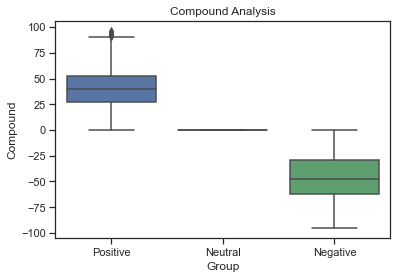

In [18]:
temp = pd.DataFrame({'Group': df.Sentiment,
                     'Compound': df.Compound})

sns.set(style="ticks")
sns.boxplot(data=temp, x='Group', y='Compound')

plt.xlabel('Group')
plt.ylabel('Compound')
plt.title('Compound Analysis')

plt.show()

In [19]:
percent_val = 100 * df['Sentiment'].value_counts()/len(df)
percent_val

Neutral     45.858994
Negative    32.112293
Positive    22.028713
Name: Sentiment, dtype: float64

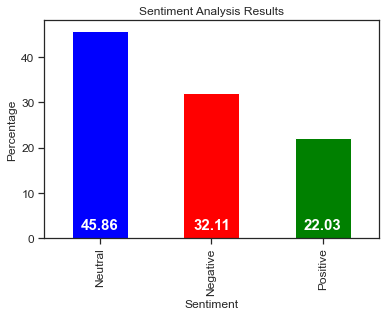

In [20]:
percent_val.plot.bar(color=['blue', 'red', 'green'],title='Sentiment Analysis Results', xlabel='Sentiment', ylabel='Percentage',fontsize=12, figsize=(6, 4))
plt.text(0, 2, str(round(percent_val['Neutral'], 2)), ha='center',fontsize=15,color="white",fontweight="bold")
plt.text(1, 2, str(round(percent_val['Negative'], 2)), ha='center',fontsize=15,color="white",fontweight="bold")
plt.text(2, 2, str(round(percent_val['Positive'], 2)), ha='center',fontsize=15,color="white",fontweight="bold")

plt.show()

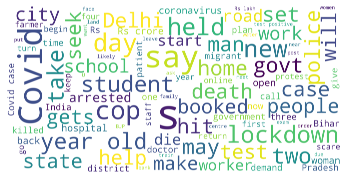

In [21]:
word_cloud_text = ''.join(df['Headline'])

wordcloud = WordCloud(max_font_size=100,
                      max_words=100,
                      background_color="white", 
                      scale = 10,
                      width=800, 
                      height=400 
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off")
plt.show()

In [22]:
df = df[df['Sentiment'].isin(['Positive', 'Negative'])].copy()
df['Sentiment_rating'] = np.where(df['Sentiment'] == 'Positive', 1, 0)

In [23]:
df

,index,Unnamed: 0,S_No,URL,Date,Headline,Headline Link,Positive,Negative,Neutral,Compound,Sentiment,Sentiment_rating
0,0,0,0,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Shivin Narang injures his hand on the set of h...,http://timesofindia.indiatimes.com//tv/news/hi...,24.2,0.0,75.8,49.39,Positive,1
2,2,2,2,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,A grand Hanukkah celebration held in the city,http://timesofindia.indiatimes.com//city/benga...,33.3,0.0,66.7,45.88,Positive,1
3,3,3,3,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,"I respect my competitors, because they bring o...",http://timesofindia.indiatimes.com//entertainm...,42.2,0.0,57.8,80.74,Positive,1
4,4,4,4,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Strong New Year resolutions keep young minds m...,http://timesofindia.indiatimes.com//life-style...,51.2,0.0,48.8,74.30,Positive,1
5,5,5,5,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Bhuvann Ponnannaa gets a surprise birthday poo...,http://timesofindia.indiatimes.com//entertainm...,49.0,0.0,51.0,58.59,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,50000,50000,50000,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,‘Man-eater’ leopard shot dead in Almora,/city/dehradun/man-eater-leopard-shot-dead-in-...,0.0,46.2,53.8,-64.86,Negative,0
50002,50002,50002,50002,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,History-sheeter among 3 arrested ‘middlemen’,/city/kochi/history-sheeter-among-3-arrested-m...,0.0,50.8,49.2,-47.67,Negative,0
50005,50005,50005,50005,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,Mathematics artist no more,/city/chennai/mathematics-artist-no-more/artic...,0.0,42.3,57.7,-29.60,Negative,0
50006,50006,50006,50006,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,No entry-exit in Kolhapur district,/city/aurangabad/no-entry-exit-in-kolhapur-dis...,0.0,35.5,64.5,-29.60,Negative,0


In [24]:
df.Sentiment_rating.value_counts()

0    16060
1    11017
Name: Sentiment_rating, dtype: int64

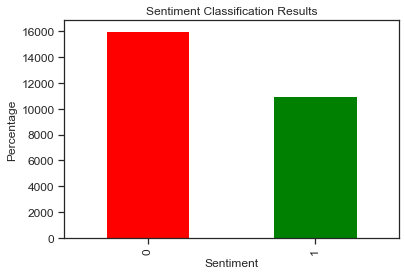

In [25]:
df.Sentiment_rating.value_counts().plot.bar(color=['red', 'green'],title='Sentiment Classification Results', xlabel='Sentiment', ylabel='Percentage',fontsize=12, figsize=(6, 4))
plt.show()

<Figure size 1080x360 with 0 Axes>

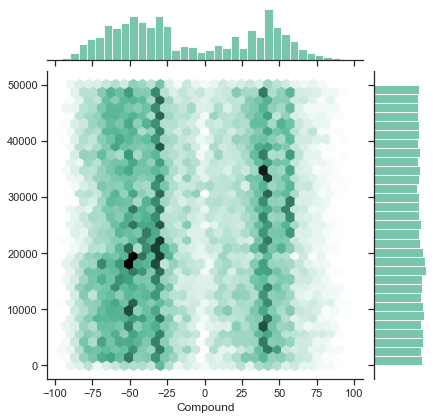

In [26]:
fig = plt.figure(figsize=(15, 5))

sns.jointplot(x='Compound', y=df.index, data=df, kind="hex", color="#4CB391")

<Figure size 1080x360 with 0 Axes>

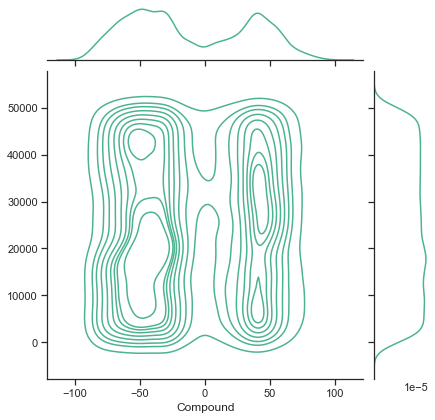

In [27]:
fig = plt.figure(figsize=(15, 5))
sns.jointplot(x='Compound', y=df.index, data=df, kind="kde", color="#4CB391")


<Figure size 1080x360 with 0 Axes>

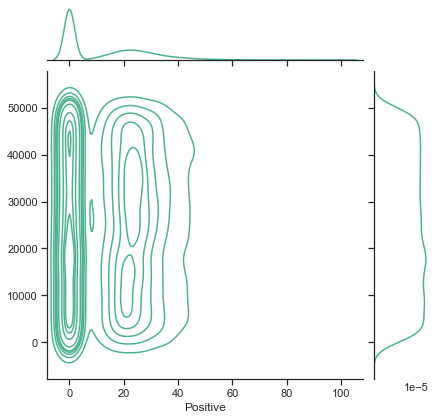

In [28]:
fig = plt.figure(figsize=(15, 5))
sns.jointplot(x='Positive', y=df.index, data=df, kind="kde", color="#4CB391")


<Figure size 1080x360 with 0 Axes>

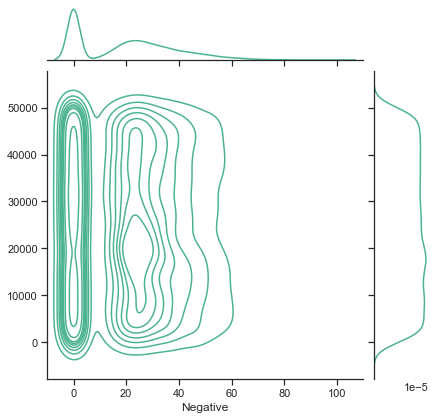

In [29]:
fig = plt.figure(figsize=(15, 5))
sns.jointplot(x='Negative', y=df.index, data=df, kind="kde", color="#4CB391")


<Figure size 1080x360 with 0 Axes>

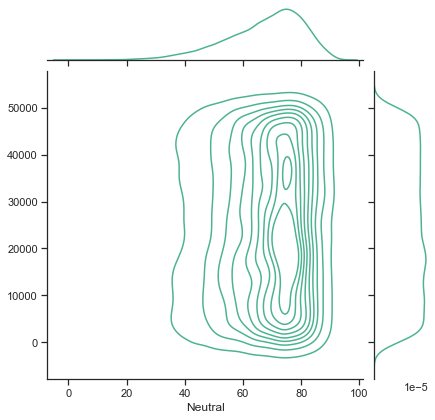

In [30]:
fig = plt.figure(figsize=(15, 5))
sns.jointplot(x='Neutral', y=df.index, data=df, kind="kde", color="#4CB391")


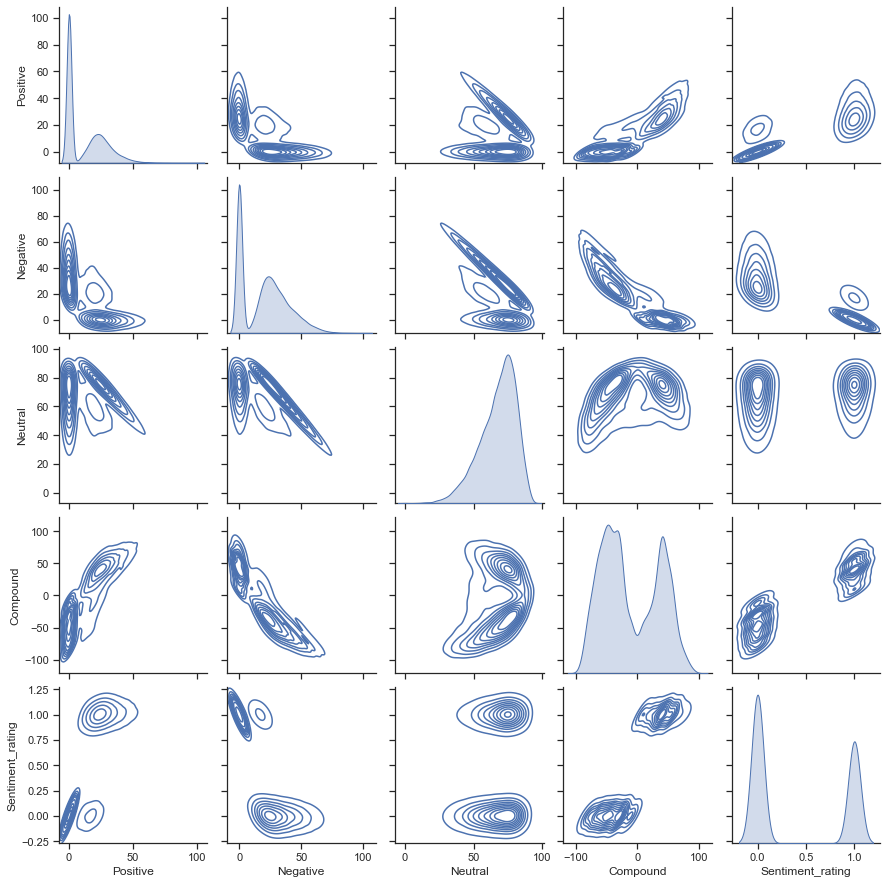

In [31]:
sns.pairplot(
    df, 
    x_vars=["Positive", "Negative", "Neutral","Compound",'Sentiment_rating'],
    y_vars=["Positive", "Negative", "Neutral","Compound",'Sentiment_rating'],
    kind="kde",
    diag_kind="auto"
)

In [32]:
df['Headline_new'] = df['Headline'].str.lower()  

In [33]:
df

,index,Unnamed: 0,S_No,URL,Date,Headline,Headline Link,Positive,Negative,Neutral,Compound,Sentiment,Sentiment_rating,Headline_new
0,0,0,0,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Shivin Narang injures his hand on the set of h...,http://timesofindia.indiatimes.com//tv/news/hi...,24.2,0.0,75.8,49.39,Positive,1,shivin narang injures his hand on the set of h...
2,2,2,2,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,A grand Hanukkah celebration held in the city,http://timesofindia.indiatimes.com//city/benga...,33.3,0.0,66.7,45.88,Positive,1,a grand hanukkah celebration held in the city
3,3,3,3,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,"I respect my competitors, because they bring o...",http://timesofindia.indiatimes.com//entertainm...,42.2,0.0,57.8,80.74,Positive,1,"i respect my competitors, because they bring o..."
4,4,4,4,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Strong New Year resolutions keep young minds m...,http://timesofindia.indiatimes.com//life-style...,51.2,0.0,48.8,74.30,Positive,1,strong new year resolutions keep young minds m...
5,5,5,5,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Bhuvann Ponnannaa gets a surprise birthday poo...,http://timesofindia.indiatimes.com//entertainm...,49.0,0.0,51.0,58.59,Positive,1,bhuvann ponnannaa gets a surprise birthday poo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,50000,50000,50000,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,‘Man-eater’ leopard shot dead in Almora,/city/dehradun/man-eater-leopard-shot-dead-in-...,0.0,46.2,53.8,-64.86,Negative,0,‘man-eater’ leopard shot dead in almora
50002,50002,50002,50002,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,History-sheeter among 3 arrested ‘middlemen’,/city/kochi/history-sheeter-among-3-arrested-m...,0.0,50.8,49.2,-47.67,Negative,0,history-sheeter among 3 arrested ‘middlemen’
50005,50005,50005,50005,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,Mathematics artist no more,/city/chennai/mathematics-artist-no-more/artic...,0.0,42.3,57.7,-29.60,Negative,0,mathematics artist no more
50006,50006,50006,50006,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,No entry-exit in Kolhapur district,/city/aurangabad/no-entry-exit-in-kolhapur-dis...,0.0,35.5,64.5,-29.60,Negative,0,no entry-exit in kolhapur district


In [34]:
word_tokenize("Hi! this is a test sentence .")

['Hi', '!', 'this', 'is', 'a', 'test', 'sentence', '.']

In [35]:
token_lists = [word_tokenize(each) for each in df['Headline']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens before case change : ",len(set(tokens)))

token_lists_lower = [word_tokenize(each) for each in df['Headline_new']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens after case change : ",len(set(tokens_lower))) 

initial_no_of_token = len(set(tokens))
token_after_case_chnage = len(set(tokens_lower))

Number of unique tokens before case change :  28166
Number of unique tokens after case change :  24085


In [36]:
df

,index,Unnamed: 0,S_No,URL,Date,Headline,Headline Link,Positive,Negative,Neutral,Compound,Sentiment,Sentiment_rating,Headline_new
0,0,0,0,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Shivin Narang injures his hand on the set of h...,http://timesofindia.indiatimes.com//tv/news/hi...,24.2,0.0,75.8,49.39,Positive,1,shivin narang injures his hand on the set of h...
2,2,2,2,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,A grand Hanukkah celebration held in the city,http://timesofindia.indiatimes.com//city/benga...,33.3,0.0,66.7,45.88,Positive,1,a grand hanukkah celebration held in the city
3,3,3,3,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,"I respect my competitors, because they bring o...",http://timesofindia.indiatimes.com//entertainm...,42.2,0.0,57.8,80.74,Positive,1,"i respect my competitors, because they bring o..."
4,4,4,4,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Strong New Year resolutions keep young minds m...,http://timesofindia.indiatimes.com//life-style...,51.2,0.0,48.8,74.30,Positive,1,strong new year resolutions keep young minds m...
5,5,5,5,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Bhuvann Ponnannaa gets a surprise birthday poo...,http://timesofindia.indiatimes.com//entertainm...,49.0,0.0,51.0,58.59,Positive,1,bhuvann ponnannaa gets a surprise birthday poo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,50000,50000,50000,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,‘Man-eater’ leopard shot dead in Almora,/city/dehradun/man-eater-leopard-shot-dead-in-...,0.0,46.2,53.8,-64.86,Negative,0,‘man-eater’ leopard shot dead in almora
50002,50002,50002,50002,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,History-sheeter among 3 arrested ‘middlemen’,/city/kochi/history-sheeter-among-3-arrested-m...,0.0,50.8,49.2,-47.67,Negative,0,history-sheeter among 3 arrested ‘middlemen’
50005,50005,50005,50005,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,Mathematics artist no more,/city/chennai/mathematics-artist-no-more/artic...,0.0,42.3,57.7,-29.60,Negative,0,mathematics artist no more
50006,50006,50006,50006,https://timesofindia.indiatimes.com/2020/7/19/...,2020-07-19 00:00:00,No entry-exit in Kolhapur district,/city/aurangabad/no-entry-exit-in-kolhapur-dis...,0.0,35.5,64.5,-29.60,Negative,0,no entry-exit in kolhapur district


In [37]:
spl_chars = df['Headline_new'].apply(lambda review: [char for char in list(review) if not char.isalnum() and char != ' '])

flat_list = [item for sublist in spl_chars for item in sublist]

set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '?',
 '£',
 '°',
 '\u200b',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '…',
 '₹',
 '\u3000',
 '\ufeff'}

In [38]:
headline_backup = df['Headline_new'].copy()
df['Headline_new'] = df['Headline_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

In [39]:
print("Headlines before removing special char :" , headline_backup[50000])
print("Headlines after removing special char  :" , df['Headline_new'][50000])


Headlines before removing special char : ‘man-eater’ leopard shot dead in almora
Headlines after removing special char  :  man eater  leopard shot dead in almora


In [40]:
token_lists = token_lists_lower
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens after case change : ",len(set(tokens)))

token_lists_no_special_char = [word_tokenize(each) for each in df['Headline_new']]
tokens_no_special_char = [item for sublist in token_lists_no_special_char for item in sublist]
print("Number of unique tokens after removing special char : ",len(set(tokens_no_special_char)))
# 22 % drop

token_after_removing_special_char = len(set(tokens_no_special_char))

Number of unique tokens after case change :  24085
Number of unique tokens after removing special char :  21930


In [41]:
print('Available languages for NLTK v.3.4.5: ')
print(stopwords.fileids())


Available languages for NLTK v.3.4.5: 
['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [42]:
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []
sentence = df['Headline_new'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', without_stop_words)

-- Original Sentence --
 shivin narang injures his hand on the set of his show

-- Stopwords in the sentence --
 ['his', 'on', 'the', 'of', 'his']

-- Non-stopwords in the sentence --
 ['shivin', 'narang', 'injures', 'hand', 'set', 'show']


In [44]:
def stopwords_removal(stop_words, sentence):
    return [word for word in word_tokenize(sentence) if word not in stop_words]

df['Headline_new_no_stop_word'] = df['Headline_new'].apply(lambda row: stopwords_removal(stop_words, row))
df[['Headline_new_no_stop_word','Headline_new']]

,Headline_new_no_stop_word,Headline_new
0,"[shivin, narang, injures, hand, set, show]",shivin narang injures his hand on the set of h...
2,"[grand, hanukkah, celebration, held, city]",a grand hanukkah celebration held in the city
3,"[respect, competitors, bring, best, yash]",i respect my competitors because they bring o...
4,"[strong, new, year, resolutions, keep, young, ...",strong new year resolutions keep young minds m...
5,"[bhuvann, ponnannaa, gets, surprise, birthday,...",bhuvann ponnannaa gets a surprise birthday poo...
...,...,...
50000,"[man, eater, leopard, shot, dead, almora]",man eater leopard shot dead in almora
50002,"[history, sheeter, among, 3, arrested, middlemen]",history sheeter among 3 arrested middlemen
50005,"[mathematics, artist]",mathematics artist no more
50006,"[entry, exit, kolhapur, district]",no entry exit in kolhapur district


In [45]:
token_lists = token_lists_no_special_char
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens after removing special char : ",len(set(tokens)))
token_no_stop_words = [item for sublist in df['Headline_new_no_stop_word'] for item in sublist]
print("Number of unique tokens after removing stop words : ",len(set(token_no_stop_words)))

token_after_removing_stop_words = len(set(token_no_stop_words))

Number of unique tokens after removing special char :  21930
Number of unique tokens after removing stop words :  21784


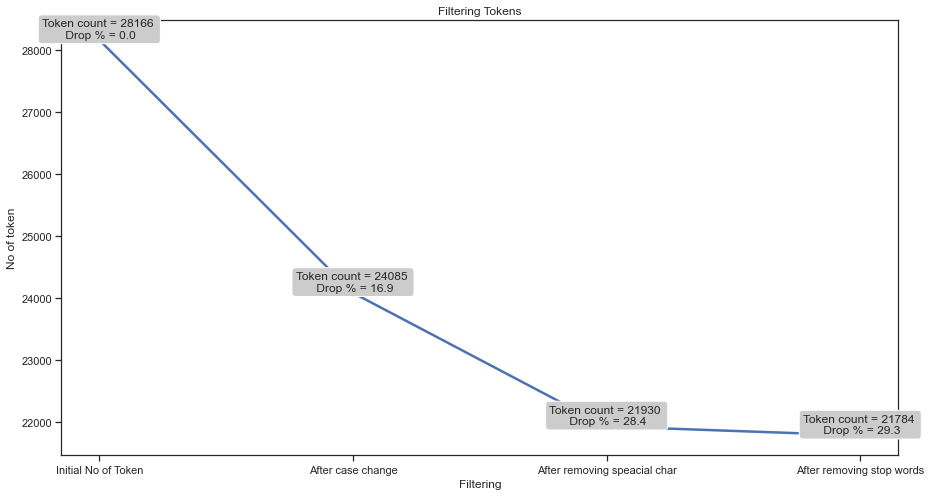

In [46]:
fig = plt.figure(figsize=(15, 8))
x_var = ['Initial No of Token', 'After case change', 'After removing speacial char', 'After removing stop words']
y_var = [
    initial_no_of_token, 
    token_after_case_chnage, 
    token_after_removing_special_char, 
    token_after_removing_stop_words
]

drop_percentage = ((y_var[0] - y_var[-1]) / y_var[0]) * 100

sns.lineplot(x=x_var, y=y_var,linewidth=2.5)
plt.xlabel('Filtering')
plt.ylabel('No of token')
plt.title('Filtering Tokens')
bbox = dict(boxstyle ="round", fc ="0.8")
for i in range(len(x_var)):
    plt.annotate(
        f'Token count = {y_var[i]:d} \n Drop % = {(((initial_no_of_token - y_var[i]) / y_var[i]) * 100):.1f}', 
        (x_var[i], y_var[i]),
        bbox = bbox, 
        ha='center', 
        va='bottom'
    )

plt.show()

In [47]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [48]:
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


In [49]:
def stemm_terms(row):
    return [lancaster.stem(term) for term in row]
def lemmatize_terms(row):
    return [lemmatizer.lemmatize(term) for term in row]
    
df['Headline_new_stemm'] = df['Headline_new_no_stop_word'].apply(lambda row: stemm_terms(row))
df['Headline_new_lemm'] = df['Headline_new_no_stop_word'].apply(lambda row: lemmatize_terms(row))
df[['Headline_new_no_stop_word','Headline_new_stemm','Headline_new_lemm']]

,Headline_new_no_stop_word,Headline_new_stemm,Headline_new_lemm
0,"[shivin, narang, injures, hand, set, show]","[shivin, narang, ind, hand, set, show]","[shivin, narang, injures, hand, set, show]"
2,"[grand, hanukkah, celebration, held, city]","[grand, hanukkah, celebr, held, city]","[grand, hanukkah, celebration, held, city]"
3,"[respect, competitors, bring, best, yash]","[respect, competit, bring, best, yash]","[respect, competitor, bring, best, yash]"
4,"[strong, new, year, resolutions, keep, young, ...","[strong, new, year, resolv, keep, young, mind,...","[strong, new, year, resolution, keep, young, m..."
5,"[bhuvann, ponnannaa, gets, surprise, birthday,...","[bhuvan, ponnanna, get, surpr, birthday, pool,...","[bhuvann, ponnannaa, get, surprise, birthday, ..."
...,...,...,...
50000,"[man, eater, leopard, shot, dead, almora]","[man, eat, leopard, shot, dead, almor]","[man, eater, leopard, shot, dead, almora]"
50002,"[history, sheeter, among, 3, arrested, middlemen]","[hist, sheet, among, 3, arrest, middlem]","[history, sheeter, among, 3, arrested, middleman]"
50005,"[mathematics, artist]","[mathem, art]","[mathematics, artist]"
50006,"[entry, exit, kolhapur, district]","[entry, exit, kolhap, district]","[entry, exit, kolhapur, district]"


In [50]:
# ml
df[['Headline','Headline_new_no_stop_word','Positive','Negative','Neutral','Compound','Sentiment_rating']].head(20)

,Headline,Headline_new_no_stop_word,Positive,Negative,Neutral,Compound,Sentiment_rating
0,Shivin Narang injures his hand on the set of h...,"[shivin, narang, injures, hand, set, show]",24.2,0.0,75.8,49.39,1
2,A grand Hanukkah celebration held in the city,"[grand, hanukkah, celebration, held, city]",33.3,0.0,66.7,45.88,1
3,"I respect my competitors, because they bring o...","[respect, competitors, bring, best, yash]",42.2,0.0,57.8,80.74,1
4,Strong New Year resolutions keep young minds m...,"[strong, new, year, resolutions, keep, young, ...",51.2,0.0,48.8,74.30,1
5,Bhuvann Ponnannaa gets a surprise birthday poo...,"[bhuvann, ponnannaa, gets, surprise, birthday,...",49.0,0.0,51.0,58.59,1
6,A grand Hanukkah celebration held in the city,"[grand, hanukkah, celebration, held, city]",33.3,0.0,66.7,45.88,1
7,Hiphop Adhi sings a lively kuthu song,"[hiphop, adhi, sings, lively, kuthu, song]",36.7,0.0,63.3,44.04,1
9,Bhuvann Ponnannaa gets a surprise birthday poo...,"[bhuvann, ponnannaa, gets, surprise, birthday,...",49.0,0.0,51.0,58.59,1
10,Bengaluru students wish for peace and a greene...,"[bengaluru, students, wish, peace, greener, pl...",50.8,0.0,49.2,73.51,1
11,I found peace and closure during my second sti...,"[found, peace, closure, second, stint, inside,...",21.2,0.0,78.8,54.23,1


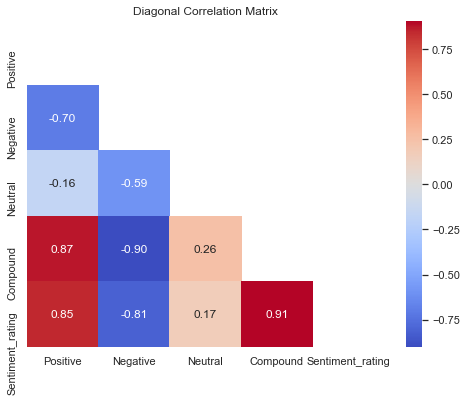

In [51]:
data = df[['Positive', 'Negative','Neutral', 'Compound','Sentiment_rating']]

correlation_matrix = data.corr()

sns.set(style="white")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")

plt.title("Diagonal Correlation Matrix")

plt.show()

In [52]:
# n-grams
sentence = 'Hiphop Adhi sings a lively kuthu song'

for n in range(1, 8):
    print(str(n) + '-grams:\n', list(ngrams(sentence.split(), n)))

1-grams:
 [('Hiphop',), ('Adhi',), ('sings',), ('a',), ('lively',), ('kuthu',), ('song',)]
2-grams:
 [('Hiphop', 'Adhi'), ('Adhi', 'sings'), ('sings', 'a'), ('a', 'lively'), ('lively', 'kuthu'), ('kuthu', 'song')]
3-grams:
 [('Hiphop', 'Adhi', 'sings'), ('Adhi', 'sings', 'a'), ('sings', 'a', 'lively'), ('a', 'lively', 'kuthu'), ('lively', 'kuthu', 'song')]
4-grams:
 [('Hiphop', 'Adhi', 'sings', 'a'), ('Adhi', 'sings', 'a', 'lively'), ('sings', 'a', 'lively', 'kuthu'), ('a', 'lively', 'kuthu', 'song')]
5-grams:
 [('Hiphop', 'Adhi', 'sings', 'a', 'lively'), ('Adhi', 'sings', 'a', 'lively', 'kuthu'), ('sings', 'a', 'lively', 'kuthu', 'song')]
6-grams:
 [('Hiphop', 'Adhi', 'sings', 'a', 'lively', 'kuthu'), ('Adhi', 'sings', 'a', 'lively', 'kuthu', 'song')]
7-grams:
 [('Hiphop', 'Adhi', 'sings', 'a', 'lively', 'kuthu', 'song')]


In [53]:
from collections import defaultdict

df.Headline_new
largest_headline = max(df.Headline_new, key=len)
print(largest_headline)
print(len(largest_headline))

my_dict = defaultdict(int)

for i in df.Headline_new:
    for n in range(1, 32):
        arr = list(ngrams(i.split(), n))
        count = len(arr)
        my_dict[str(n) + '-grams: '] += count
        
print(my_dict)

video  salman khan goes brutal with his words to make people take the coronavirus lockdown seriously  says   in logo chand jokaro ke vajah se yeh bimari faili ja rahi hai 
171
defaultdict(<class 'int'>, {'1-grams: ': 265276, '2-grams: ': 238199, '3-grams: ': 211122, '4-grams: ': 184067, '5-grams: ': 157057, '6-grams: ': 130243, '7-grams: ': 104137, '8-grams: ': 79828, '9-grams: ': 58463, '10-grams: ': 40990, '11-grams: ': 27734, '12-grams: ': 18330, '13-grams: ': 12071, '14-grams: ': 8056, '15-grams: ': 5468, '16-grams: ': 3756, '17-grams: ': 2628, '18-grams: ': 1821, '19-grams: ': 1265, '20-grams: ': 879, '21-grams: ': 590, '22-grams: ': 394, '23-grams: ': 256, '24-grams: ': 163, '25-grams: ': 100, '26-grams: ': 57, '27-grams: ': 28, '28-grams: ': 15, '29-grams: ': 9, '30-grams: ': 5, '31-grams: ': 2})


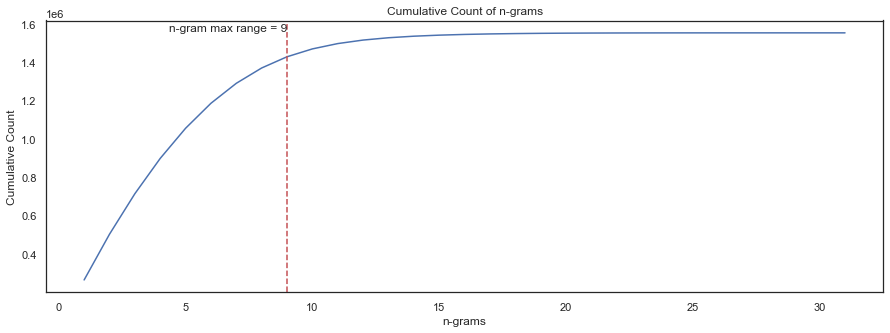

In [54]:
cumulative_counts = []
total_count = 0

for key in my_dict.keys():
    total_count += my_dict[key]
    cumulative_counts.append(total_count)
    
x = range(1, len(cumulative_counts) + 1)

fig = plt.figure(figsize=(15, 5))

plt.plot(x, cumulative_counts)
plt.xlabel('n-grams')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Count of n-grams')
plt.axvline(x=9, color='r', linestyle='--')
plt.text(9, max(cumulative_counts), 'n-gram max range = 9', va='bottom', ha='right')

plt.show()


In [61]:
# Bag-of-words
# The bag-of-words procedure falls under a broader category of techniques known as count-based representations. These are techniques to analyze documents by indicating how frequently certain types of structures occur throughout.
# Let's create a word-document co-occurrence matrix for our set of reviews using the CountVectorizer class that automatically accounts for certain preprocessing steps like removing stopwords, stemming, creating n-grams, and word tokenization:
# The following code creates a word-document matrix.

vec = CountVectorizer()
X = vec.fit_transform(df['Headline_new'])
Headline_df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
Headline_df.head()

,000,000cr,000kg,000km,000t,002,005,010620,016,019,...,zoo,zoom,zooms,zp,zps,zsi,zuari,zumba,zyada,zydus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
### Creating a python object of the class CountVectorizer
bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             stop_words=noise_words, # List of stopwords
                             ngram_range=(1,1)) # number of n-grams

bow_data = bow_counts.fit_transform(df['Headline_new'])

In [63]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    df['Sentiment_rating'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes

In [64]:
y_test_bow.value_counts()/y_test_bow.shape[0]

0    0.592504
1    0.407496
Name: Sentiment_rating, dtype: float64

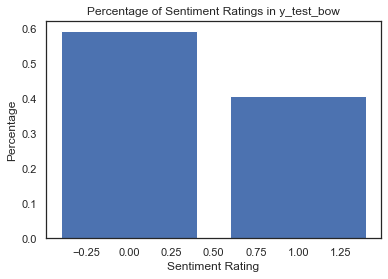

In [68]:
value_counts = y_test_bow.value_counts()
labels = value_counts.index
counts = value_counts.values
percentage = counts / y_test_bow.shape[0]

plt.bar(labels, percentage)
plt.xlabel('Sentiment Rating')
plt.ylabel('Percentage')
plt.title('Percentage of Sentiment Ratings in y_test_bow')
plt.show()


In [69]:
lr_model_all = LogisticRegression(max_iter=1000)
lr_model_all.fit(X_train_bow, y_train_bow)

test_pred_lr_all = lr_model_all.predict(X_test_bow)

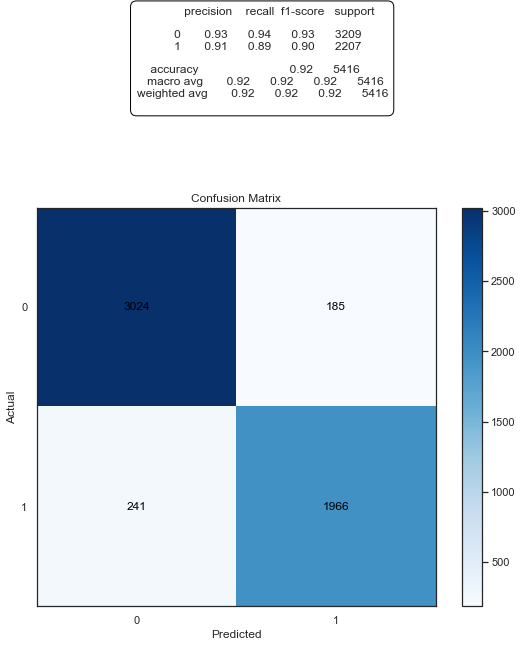

In [72]:
cm = confusion_matrix(y_test_bow, test_pred_lr_all)

report = classification_report(y_test_bow, test_pred_lr_all)

fig, ax = plt.subplots(figsize=(8, 8))

im = ax.imshow(cm, cmap='Blues')

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.colorbar(im)

for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.text(0, -1, report, ha='left', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()

plt.show()

In [73]:
print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9022487379531895


In [74]:
bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,9))

bow_data = bow_counts.fit_transform(df.Headline_new)

In [75]:
bow_data

<27077x1020299 sparse matrix of type '<class 'numpy.int64'>'
	with 1425309 stored elements in Compressed Sparse Row format>

In [76]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    df['Sentiment_rating'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes

In [77]:
# Defining and training the model
lr_model_all_new = LogisticRegression(max_iter = 1000)
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

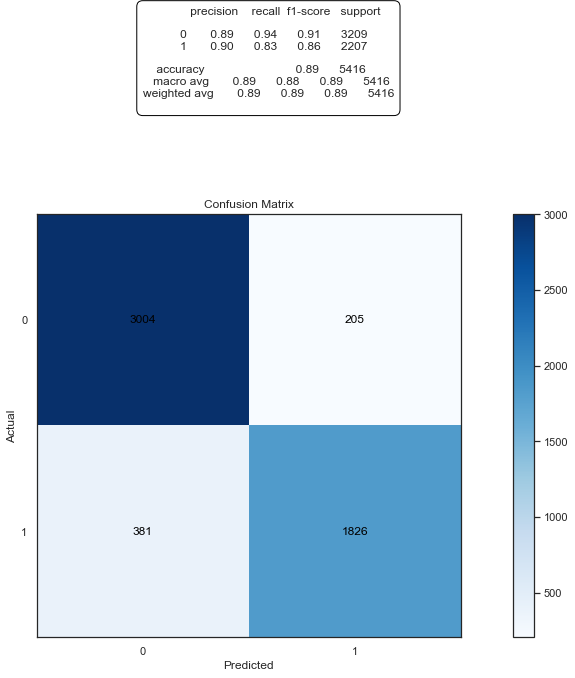

In [78]:
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

cm = confusion_matrix(y_test_bow, test_pred_lr_all)

report = classification_report(y_test_bow, test_pred_lr_all)

fig, ax = plt.subplots(figsize=(15, 10))

im = ax.imshow(cm, cmap='Blues')

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.colorbar(im)

for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.text(0, -1, report, ha='left', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()

plt.show()


In [79]:
print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))

F1 score:  0.8617272298253893


In [80]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), # ge tall the n-gram feature names
                                   lr_model_all_new.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

In [81]:
lr_weights.shape

(1020299, 2)

In [ ]:
# lr_weights_sorted = lr_weights.sort_values(['weights'], ascending=False)

# plt.figure(figsize=(12, 8))
# plt.barh(lr_weights_sorted['words'], lr_weights_sorted['weights'], color='blue')

# plt.xlabel('Weights')
# plt.ylabel('Words')
# plt.title('Weights of Features')

# plt.show()

In [82]:
lr_weights.sort_values(['weights'], ascending = False)[:15] # top-15 more important features for positive 

,words,weights
695742,positive,4.132143
741962,relief,3.110053
357045,free,3.071324
408944,help,2.948018
358256,fresh,2.874819
828823,special,2.722313
777664,safety,2.652469
746189,rescued,2.439481
411209,helps,2.267158
322678,festival,2.190945


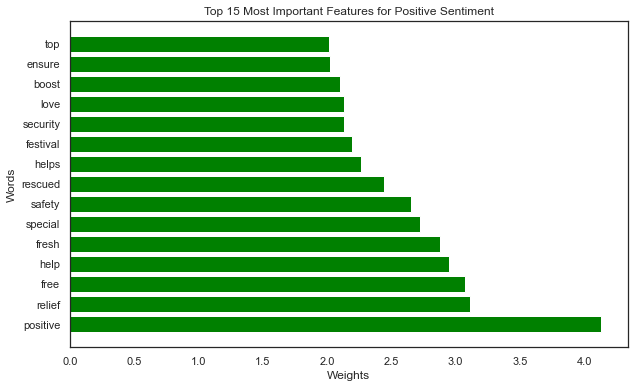

In [83]:
top_features = lr_weights.sort_values(['weights'], ascending = False)[:15] # top-15 more important features for positive 

plt.figure(figsize=(10, 6))
plt.barh(top_features['words'], top_features['weights'], color='green')

plt.xlabel('Weights')
plt.ylabel('Words')
plt.title('Top 15 Most Important Features for Positive Sentiment')

plt.show()

In [84]:
lr_weights.sort_values(['weights'], ascending = False)[-15:] # top-15 more important features for negative 

,words,weights
323570,fight,-1.939023
712139,protest,-1.949219
112974,attack,-1.992685
173674,cancer,-2.008168
585433,murder,-2.088800
239667,crisis,-2.156856
597286,negative,-2.162254
787184,scare,-2.213531
476203,isolation,-2.246364
694268,poor,-2.280570


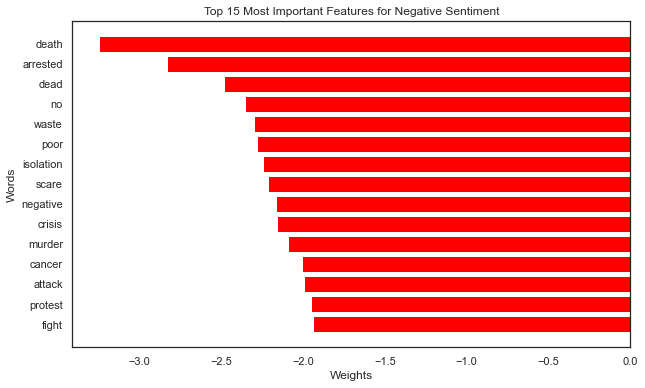

In [85]:
top_features_negative = lr_weights.sort_values(['weights'], ascending = False)[-15:] # top-15 more important features for negative 

plt.figure(figsize=(10, 6))
plt.barh(top_features_negative['words'], top_features_negative['weights'], color='red')

plt.xlabel('Weights')
plt.ylabel('Words')
plt.title('Top 15 Most Important Features for Negative Sentiment')

plt.show()


In [86]:
# TF-IDF model
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(df['Headline_new'])

In [87]:
tfidf_data

<27077x21930 sparse matrix of type '<class 'numpy.float64'>'
	with 262204 stored elements in Compressed Sparse Row format>

In [88]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            df['Sentiment_rating'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [89]:
lr_model_tf_idf = LogisticRegression(max_iter = 1000)
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

In [93]:
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.8719512195121951


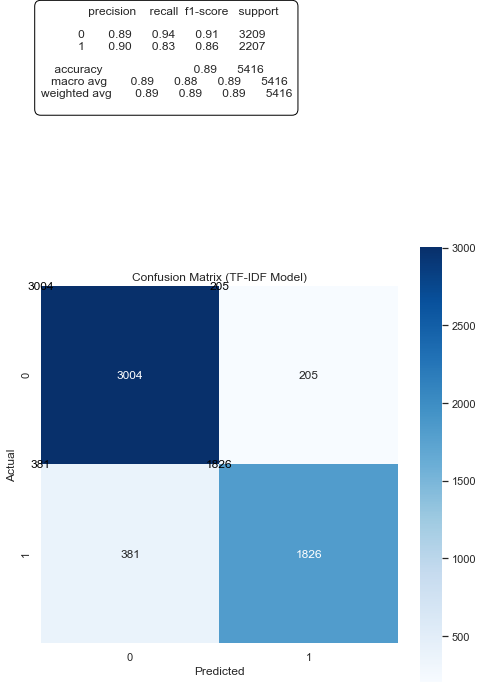

In [103]:
cm_tf_idf = confusion_matrix(y_test_tfidf, test_pred_lr_all)

fig, ax = plt.subplots(figsize=(8,8))

report = classification_report(y_test_bow, test_pred_lr_all)

im = ax.imshow(cm, cmap='Blues')

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')


for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.text(0, -1, report, ha='left', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

sns.heatmap(cm_tf_idf, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (TF-IDF Model)')

plt.show()